# Programming Exercise 1: Linear Regression

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Known Formula:

#### Hypothesis:
<p> Hypothesis, h(theta) for Linear Regression:</p>

<p><b>h = h(theta) = X * theta</b>, where x0 = 1</p>


#### Cost function:
<p>Cost function, J for Linear Regression:</p>

<p><b>J = (1/2m)*(h - y)^2</b>, where m = number of training examples(rows)</p>

#### Gradient Descent:
<p>Gradient Descent, for Linear Regression:</p>

<p><b>grad = theta - alpha * (1/m)*X'*(h - y) </b></p>

## 1. Linear Regression with One Variable

### 1.1. Read the text into a dataframe

<p>In this part of this exercise, you will implement linear regression with one variable to predict proﬁts for a food truck. Suppose you are the CEO of a restaurant franchise and are considering diﬀerent cities for opening a new outlet. The chain already has trucks in various cities and you have data for proﬁts and populations from the cities.</p>

<p>You would like to use this data to help you select which city to expand to next. The ﬁle ex1data1.txt contains the dataset for our linear regression problem. The ﬁrst column is the population of a city and the second column is the proﬁt of a food truck in that city. A negative value for proﬁt indicates a loss.</p>

In [2]:
data = pd.read_csv('ex1data1.txt', sep=",", header=None)
data.columns = ["Population","Profit"]
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 1.2 Plotting the Data

<p>Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (proﬁt and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)</p>

In [3]:
#separate the data
X = data.iloc[:,0:1] 
y = data.iloc[:,1]

In [4]:
print(X.head())
print(y.head())

   Population
0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64


In [5]:
#Function to plot data
def plotData(df):
    ax = sns.scatterplot(x = 'Population', y = 'Profit', data = df, marker = '+')
    ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s')

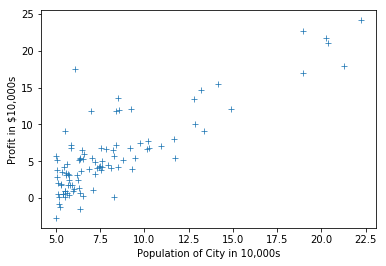

In [6]:
plotData(data)

### 1.3 Gradient Descent

<p>In this part, you will ﬁt the linear regression parameters θ to our dataset using gradient descent.</p>

### 1.3.1 Update Equations

<p>The objective of linear regression is to minimize the cost function, J, with hypothesis h(x) = θ0 + θ1*x1</p>

<p>Recall that the parameters of your model are the θj values. These are the values you will adjust to minimize cost J(θ). One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update, simultaneously.</p>

### 1.3.2 Implementation

<p>In the following lines, we add another dimension to our data to accommodate the θ0 intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.</p>

In [7]:
m = y.shape[0]

X0 = pd.DataFrame(np.ones([m, 1], dtype = int))
X0.columns = ['X0']
X = pd.concat([X0, X], axis = 1)


X = X.values[:]
y = y.values[:]

In [8]:
theta = np.zeros(X.shape[1])

#Some gradient descent settings
iterations = 1500
alpha = 0.01

theta

array([0., 0.])

### 1.3.3 Computing the cose J(θ)

<p>As you perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation.</p>

<p>Your next task is to complete the function computeCost(), which is a function that computes J(θ). As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.</p>

<p>Once you have completed the function, the next step is to run computeCost once using θ initialized to zeros, and you will see the cost printed to the screen. You should expect to see a cost of 32.07.</p>

In [9]:
def computeCost(X, y, theta):
    #computeCost for Linear Regression
    #J = computeCost(X, y, theta) computes the cost using theta as the parameter for linear regression to fit data points in X and y
    
    #Initialize some values
    m = len(y) #number of training examples
    
    #Computing h(theta) or hypothesis h
    h = np.dot(X, theta)
    
    #Compute the cost J
    loss = h - y
    J = np.sum((loss ** 2)) / (2 * m)
    
    return J

In [10]:
print('\nTesting the cost function ...\n')

#Compute and display the initial cost
J = computeCost(X, y, theta)
print('With theta = [0 ; 0]\nCost computed = \n', J)
print('Expected cost value (approx) 32.07\n')

#Further testing of the cost function
J = computeCost(X, y, [-1, 2]);
print('\nWith theta = [-1 ; 2]\nCost computed = \n', J)
print('Expected cost value (approx) 54.24\n')


Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 
 32.072733877455676
Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed = 
 54.24245508201238
Expected cost value (approx) 54.24



### 1.3.4 Gradient Descent

<p>Next, you will implement gradient descent in the function gradientDescent(). The loop structure has been written for you, and you only need to supply the updates to θ within each iteration.</p>

<p>As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost J(θ) is parameterized by the vector θ, not X and y. That is, we minimize the value of J(θ) by changing the values of the vector θ, not by changing X or y. Refer to the equations in this handout and to the video lectures if you are uncertain.</p>

<p>A good way to verify that gradient descent is working correctly is to look at the value of J(θ) and check that it is decreasing with each step. The starter code for gradientDescent() calls computeCost() on every iteration and prints the cost. Assuming you have implemented gradient descent and computeCost correctly, your value of J(θ) should never increase, and should converge to a steady value by the end of the algorithm.</p>

In [11]:
def gradientDescent(X, y, alpha, iterations):
    
    #theta = gradientDescent(X, y, theta, alpha, iterations) updates theta by taking iterations gradient steps with learning rate alpha
    
    #Initialize values
    theta = np.zeros(X.shape[1])
    m = y.shape[0] #number of training examples
    
    J_history = [computeCost(X, y, theta)]
    
    while(iterations > 0):
        h = np.dot(X, theta)
        theta = theta - (alpha/m) * X.T.dot(h - y)
        iterations -= 1
        J_history.append(computeCost(X, y, theta))
        
    return theta, J_history

In [12]:
print('\nRunning Gradient Descent ...\n')
#run gradient descent
theta, J = gradientDescent(X, y, alpha, iterations)

#print theta
print('Theta found by gradient descent:\n')
print('\n', theta)
print('Expected theta values (approx)\n')
print('-3.6303\n  1.1664\n\n')


Running Gradient Descent ...

Theta found by gradient descent:


 [-3.63029144  1.16636235]
Expected theta values (approx)

-3.6303
  1.1664




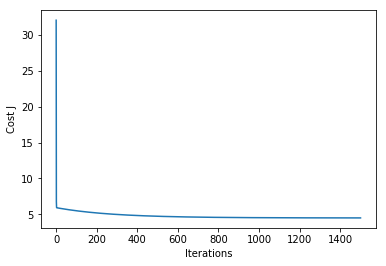

In [13]:
#Plot the iterations vs cost i.e. convergence
plt.plot(range(len(J)), J)
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.show()

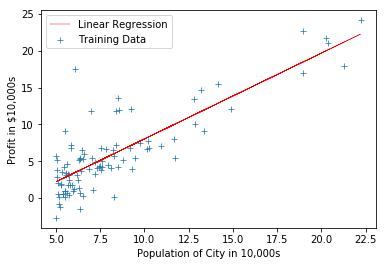

In [14]:
#plot the linear fit
plotData(data)
plt.plot(X[:,1], np.dot(X, theta), '-', color = 'red', linewidth = 0.45)
plt.legend(labels=['Linear Regression', 'Training Data'])
plt.show()

In [15]:
#Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of \n', predict1*10000)

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of\n', predict2*10000)

For population = 35,000, we predict a profit of 
 4519.767867701763
For population = 70,000, we predict a profit of
 45342.450129447134


### 1.4 Visualizing J(θ)

<p>To understand the cost function J(θ) better, you will now plot the cost over a 2-dimensional grid of θ0 and θ1 values.</p>

In [16]:
print('Visualizing J(theta_0, theta_1) ...\n')

#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

#Initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)), dtype = int)

#Fill out J_vals
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = computeCost(X, y, t)
        


Visualizing J(theta_0, theta_1) ...



Text(0.5, 0.92, 'Surface Plot')

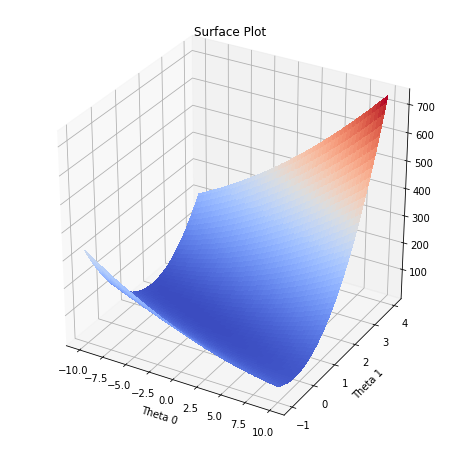

In [17]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot

fig = plt.figure(figsize = (8, 8))
ax = fig.gca(projection='3d')

#Surface plot
theta0_x, theta1_y = np.meshgrid(theta0_vals, theta1_vals)
J_vals = J_vals.T
surf = ax.plot_surface(theta0_x, theta1_y, J_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_title('Surface Plot')

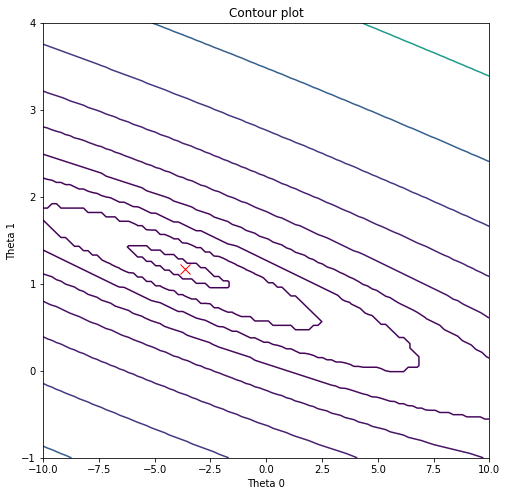

In [18]:
#Contour Plot

#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.contour(theta0_x, theta1_y, J_vals, np.logspace(-2, 3, 20))
ax1.set_xlabel('Theta 0')
ax1.set_ylabel('Theta 1')
ax1.set_title('Contour plot')

plt.plot(theta[0], theta[1], marker= 'x', markersize = 10, linewidth = 2, markeredgecolor = 'red')
plt.show()

<p>The purpose of these graphs is to show you that how J(θ) varies with changes in θ0 and θ1. The cost function J(θ) is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for θ0 and θ1, and each step of gradient descent moves closer to this point.</p>

## 2. Linear Regression with Multiple Variables

<p>In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to ﬁrst collect information on recent houses sold and make a model of housing prices.</p>

<p>The ﬁle ex1data2.txt contains a training set of housing prices in Portland, Oregon. The ﬁrst column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.</p>

### 2.1. Read the text into a dataframe

In [19]:
#Load data
data = pd.read_csv('ex1data2.txt', sep = ",", header = None)
data.columns = ['Size', 'Number of Bedrooms', 'Price']

X = data[['Size', 'Number of Bedrooms']]
y = data[['Price']]

print('First 10 examples of the dataset\n')
print(data.head(10))

First 10 examples of the dataset

   Size  Number of Bedrooms   Price
0  2104                   3  399900
1  1600                   3  329900
2  2400                   3  369000
3  1416                   2  232000
4  3000                   4  539900
5  1985                   4  299900
6  1534                   3  314900
7  1427                   3  198999
8  1380                   3  212000
9  1494                   3  242500


### 2.2 Feature Normalization

<p>By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features diﬀer by orders of magnitude, ﬁrst performing feature scaling can make gradient descent converge much more quickly.</p>

<p>Your task here is to complete the function featureNormalize() to
    <ul>
        <li>Subtract the mean value of each feature from the dataset. </li>
        <li>After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”</li>
    </ul>
</p>

<p>The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In Python, you can use the “np.std” function to compute the standard deviation. For example, inside featureNormalize(), the quantity X[:,1] contains all the values of x1 (house sizes) in the training set, so np.std(X[:,1]) computes the standard deviation of the house sizes. At the time that featureNormalize() is called, the extra column of 1’s corresponding to x0 = 1 has not yet been added to X. You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix X corresponds to one feature.</p>

<p><b>Note:</b> When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must ﬁrst normalize x using the mean and standard deviation that we had previously computed from the training set.
</p>

In [20]:
def featureNormalize(X):
    #FEATURENORMALIZE(X) returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1. This is often a good preprocessing step to do when working with learning algorithms.
    
    X_norm = X
    mu = np.zeros([1, X.shape[1]], dtype = int)
    sigma = np.zeros([1, X.shape[1]], dtype = int)
    
    mu = X.mean()
    sigma = X.std()
    
    X_norm = (X_norm - mu)/sigma
    
    return X_norm, mu, sigma

In [21]:
#Scale features and set them to zero mean
print('Normalizing Features ...\n')

X_norm, mu, sigma = featureNormalize(X)
print('The values:\n')
print('Mean: ', mu)
print('\nStandard Deviation: ', sigma)
print('\nFirst 5 values of normalized X: ', X_norm[0:5])

Normalizing Features ...

The values:

Mean:  Size                  2000.680851
Number of Bedrooms       3.170213
dtype: float64

Standard Deviation:  Size                  794.702354
Number of Bedrooms      0.760982
dtype: float64

First 5 values of normalized X:         Size  Number of Bedrooms
0  0.130010           -0.223675
1 -0.504190           -0.223675
2  0.502476           -0.223675
3 -0.735723           -1.537767
4  1.257476            1.090417


In [22]:
#Add intercept term to X
m = y.shape[0]
x0 = np.ones([m, 1], dtype = int)

X_norm = X_norm.values[:]
X_norm = np.append(x0, X_norm, axis = 1)

### 2.3 Gradient Descent

<p>Previously, you implemented gradient descent on a univariate regression problem. The only diﬀerence now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.</p>

<p>You should complete the code for computeCostMulti() and gradientDescentMulti() to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.</p>

<p>Make sure your code supports any number of features and is well-vectorized. You can use ‘X.shape[1]’ to ﬁnd out how many features are present in the dataset.</p>

In [23]:
def computeCostMulti(X, y, theta):
    #J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the parameter for linear regression to fit the data points in X and y
    
    #Initialize some values
    m = len(y) #number of training examples
    
    #Computing h(theta) or hypothesis h
    h = np.dot(X, theta)
    
    #Compute the cost J
    loss = h - y
    J = np.sum((loss ** 2)) / (2 * m)
    
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    #theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by taking num_iters gradient steps with learning rate alpha
    
    #Initialize values
    m = y.shape[0] #number of training examples
    
    J_history = [computeCostMulti(X, y, theta)]
    
    while(num_iters > 0):
        h = np.dot(X, theta)
        theta = theta - (alpha/m) * X.T.dot(h - y)
        num_iters -= 1
        J_history.append(computeCostMulti(X, y, theta))
        
    return theta, J_history

In [24]:
print('Running gradient descent ...\n')

#Choose alpha and iterations value
alpha = 0.01
num_iters = 400

#Initialize Theta and run Gradient Descent
theta = np.zeros([3,1], dtype = int)
theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)

Running gradient descent ...



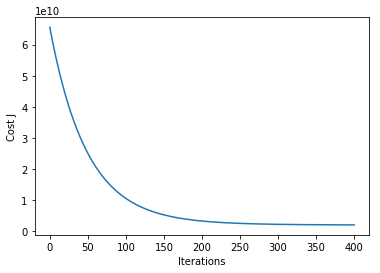

In [25]:
#Plot the iterations vs cost i.e. convergence
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.show()

In [26]:
#Display gradient descent's results
print('Theta computed from gradient descent: \n')
print(theta,'\n')

Theta computed from gradient descent: 

[[334302.06399328]
 [100087.11600585]
 [  3673.54845093]] 



In [27]:
#Estimate the price of a 1650 sq ft, 3 bedroom house

#Recall that the first column of X is all-ones. Thus, it does not need to be normalized.
price = 0
X_test = [1650, 3]

#normalize the features
X_test_norm = (X_test - mu)/sigma

X_test_norm = X_test_norm.values[:]

#Add intercept term to X
m = np.array([1], dtype = int)
X_test_norm = np.append(m, X_test_norm)
X_test_norm

array([ 1.        , -0.4412732 , -0.22367519])

In [28]:
price = np.dot(X_test_norm, theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ', price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):  [289314.62033778]


### 2.4 Normal Equation

<p>In the lecture videos, you learned that the closed-form solution to linear regression is θ =XTX−1 XT~y.</p>

<p>Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.</p>

<p>Complete the code in normalEqn() to use the formula above to calculate θ. Remember that while you don’t need to scale your features, we still need to add a column of 1’s to the X matrix to have an intercept term (θ0).</p>

<p>Optional (ungraded) exercise: Now, once you have found θ using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. You should ﬁnd that gives the same predicted price as the value you obtained using the model ﬁt with gradient descent (in Section 2.3).</p>

In [29]:
print('Solving with normal equations...\n')

#Load data
data = pd.read_csv('ex1data2.txt', sep = ",", header = None)
X = data.iloc[:,0:2]
y = data.iloc[:,-1]

X = X.values[:]
y = y.values[:]

m = len(y)

Solving with normal equations...



In [30]:
#Add intercept term to X
X = np.append(np.ones([m, 1], dtype = int), X, axis = 1)

In [31]:
def normalEqn(X, y):
    #NORMALEQN(X,y) computes the closed-form solution to linear regression using the normal equations
    
    theta = np.zeros([X.shape[1], 1], dtype = int)
    
    a = X.T.dot(X)
    a = np.linalg.inv(a)
    b = X.T.dot(y)
    
    theta = a.dot(b)
    
    return theta

In [32]:
#Calculate the parameters from the normal equation
thet_ne=normalEqn(X, y)

#Display normal equation's result
print('Theta computed from the normal equations: \n')
print(thet_ne)

Theta computed from the normal equations: 

[89597.9095428    139.21067402 -8738.01911233]


In [33]:
#Estimate the price of a 1650 sq-ft, 3 br house
price_ne= 0

X_predict = [1, 1650, 3]
price_ne = np.dot(X_predict, thet_ne)

print('The predicted price of a 1650 sq ft, 3 bedroom house (using normal equations): ', price_ne)

The predicted price of a 1650 sq ft, 3 bedroom house (using normal equations):  293081.4643348931
